# Creacion de portafolio con PCA

In [90]:
import pandas as pd
import yfinance as yf
import numpy as np

Para obtener los datos de esta notebook, se debe correr la numerada 8.

In [92]:
data_portafolio = pd.read_csv('data/portafolio-empresas-seleccionadas.csv')
data_portafolio.head(3)

,Date,ALUA.BA,BBAR.BA,BHIP.BA,BMA.BA,BRIO5.BA,CEPU.BA,CVH.BA,EDN.BA,GGAL.BA,LOMA.BA,PAMP.BA,SUPV.BA,TECO2.BA
0,2020-01-02,32.000000,142.050003,14.10,248.638550,14.0,34.650002,319.886993,22.700001,123.000000,113.263412,48.250000,50.469543,163.899994
1,2020-01-03,30.200001,142.050003,13.75,246.176346,14.0,32.400002,315.437256,21.750000,120.800003,111.950356,48.450001,49.873631,163.449997
2,2020-01-06,30.900000,142.050003,13.80,253.654175,14.0,33.950001,320.875824,22.950001,124.900002,114.333321,48.400002,51.707222,167.699997


In [89]:
data_portfolio.shape

(198, 13)

<AxesSubplot:title={'center':'Retornos diarios para empresas seleccionadas'}, xlabel='Date'>

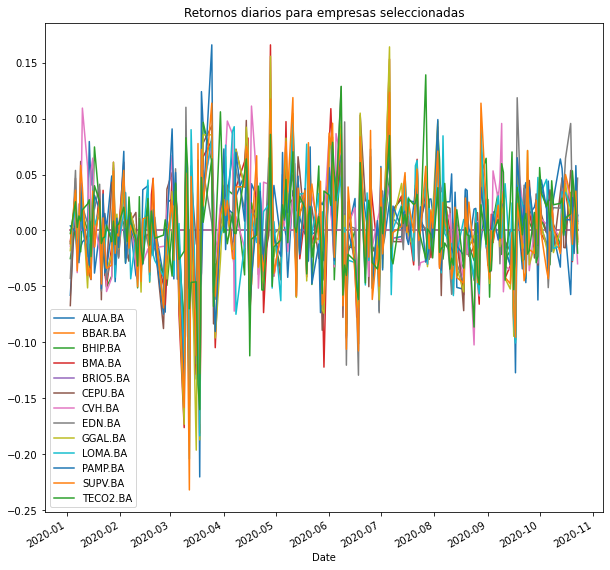

In [74]:
rs = data_portfolio.apply(np.log).diff(1) 
rs.plot(title='Retornos diarios para empresas seleccionadas', figsize = (10, 10))

<AxesSubplot:title={'center':'Retornos Acumulados de las empresas seleccionadas'}, xlabel='Date'>

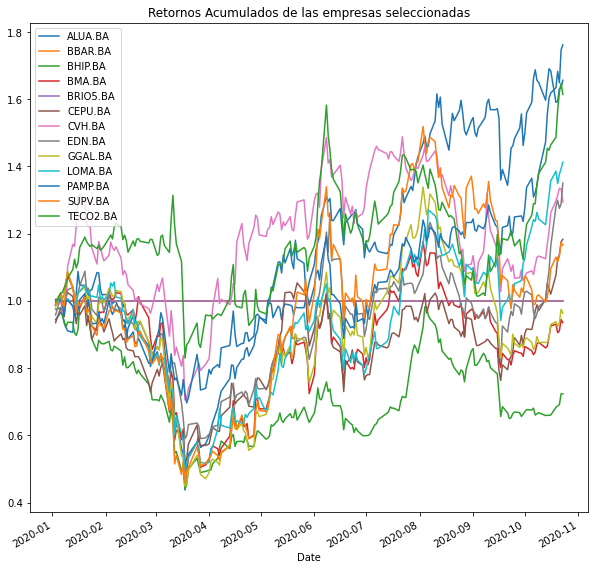

In [76]:
crs = rs.cumsum().apply(np.exp)
crs.plot(title='Retornos Acumulados de las empresas seleccionadas', figsize = (10, 10))

## PCA para construccion del portafolio

<AxesSubplot:title={'center':'Componente principal sobre los retornos'}>

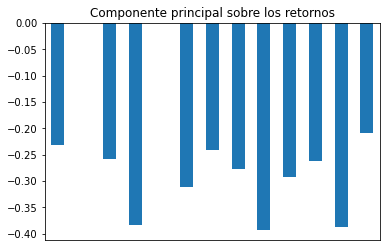

In [84]:
from sklearn.decomposition import PCA

pca = PCA(1).fit(rs.fillna(0))
pc1 = pd.Series(index=rs.columns, data=pca.components_[0])
pc1.plot(xticks=[], title='Componente principal sobre los retornos', kind = 'bar')

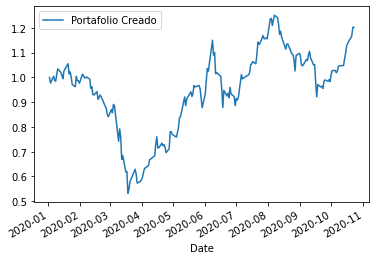

In [79]:
weights = abs(pc1) / sum(abs(pc1))
myrs = (weights * rs).sum(1)
rs_df = pd.concat([myrs], 1)
rs_df.columns = ["Portafolio Creado"]
crs_df = rs_df.cumsum().apply(np.exp)
crs_df.plot(subplots=True);

<AxesSubplot:>

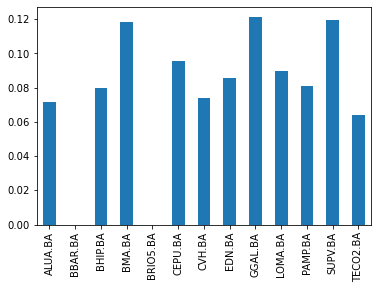

In [82]:
weights.plot(kind = 'bar')

## Pesos del portafolio resultante

Mostramos los pesos del portafolio en formato de %

In [95]:
from pprint import pprint

pprint((100 * weights).to_dict())

{'ALUA.BA': 7.162283578200969,
 'BBAR.BA': 0.0,
 'BHIP.BA': 7.975758441726007,
 'BMA.BA': 11.81295635486151,
 'BRIO5.BA': 1.0443687918120764e-19,
 'CEPU.BA': 9.564799095518737,
 'CVH.BA': 7.409599012723963,
 'EDN.BA': 8.551770197728287,
 'GGAL.BA': 12.10213138729541,
 'LOMA.BA': 8.99038657158133,
 'PAMP.BA': 8.093116342439318,
 'SUPV.BA': 11.929776803662353,
 'TECO2.BA': 6.407422214262107}
